# **Fourier Transformation and Intuition**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## **Signal Basis**

**Description**: We're going to randomly generate frequencies for signals using numpy and hopefully (fingers crossed) we manage to find these frequency coefficients by utilizing a Fourier-Based Decomposition of Summed up signals 

In [169]:
N = 500 # np.random.randint(low=5, high=200) # Stochastic number of signals to be summed

signal_data = []

for _ in range(N):
    vertical_shift = np.random.randint(-20, 20)
    phase_shift = np.random.randint(0, 30)
    rand_freq = np.random.randint(1, 100)
    rand_amp = np.random.randint(1, 20)
    data = (vertical_shift, phase_shift, rand_freq, rand_amp)

    signal_data.append(data)

signal_data = np.array(signal_data)

print(f"Number of Signals: {N}")

print("Signal Format: (Vertical Shift, Phase Shift, Frequency, Amplitude): [--", end="")
for signal in signal_data:
    print(f"({signal[0]}, {signal[1]}, {signal[2]}, {signal[3]})", end="--")
print("]")

Number of Signals: 500
Signal Format: (Vertical Shift, Phase Shift, Frequency, Amplitude): [--(-1, 21, 36, 6)--(-6, 20, 51, 17)--(-4, 13, 77, 12)--(-1, 29, 30, 5)--(-3, 26, 72, 19)--(-11, 27, 64, 19)--(-5, 25, 72, 15)--(-18, 5, 51, 5)--(-2, 7, 2, 17)--(7, 26, 33, 14)--(-16, 8, 4, 19)--(-9, 28, 50, 4)--(-7, 20, 4, 1)--(-12, 21, 42, 16)--(18, 23, 94, 16)--(1, 3, 86, 11)--(10, 6, 54, 3)--(-9, 10, 96, 13)--(13, 17, 3, 5)--(19, 5, 54, 17)--(16, 8, 67, 8)--(7, 27, 94, 4)--(-7, 10, 89, 6)--(10, 15, 12, 15)--(-13, 15, 92, 13)--(1, 13, 78, 9)--(18, 9, 76, 18)--(-3, 10, 29, 4)--(7, 18, 49, 7)--(-8, 11, 87, 1)--(-14, 25, 42, 11)--(18, 13, 82, 12)--(6, 15, 71, 5)--(-13, 8, 81, 14)--(15, 11, 46, 6)--(-2, 5, 27, 2)--(-11, 20, 61, 9)--(-17, 6, 11, 1)--(6, 12, 59, 15)--(5, 7, 68, 11)--(17, 13, 18, 9)--(5, 18, 25, 15)--(-1, 24, 61, 16)--(2, 22, 19, 13)--(15, 17, 15, 6)--(-18, 3, 41, 19)--(4, 13, 5, 19)--(-10, 21, 7, 13)--(-7, 28, 22, 1)--(10, 2, 67, 11)--(-16, 26, 58, 13)--(-13, 4, 71, 12)--(-4, 21, 39

In [170]:
def sinusodial(vertical_shift, phase_shift, freq, amp, data) -> np.array:
    return np.array(vertical_shift + amp * np.sin(2 * np.pi * freq * data + phase_shift)) # Sin signal formula

def sum_signals(signals, start, end, sample_freq) -> list:
    num_signals = len(signals)
    
    summed_signal = np.array([0] * (sample_freq * (end - start)))
    
    steps = np.linspace(start = start, stop = end, num=sample_freq * (end-start))

    for signal in signals:
        ver_shift, phase_shift, freq, amp = signal[0], signal[1], signal[2], signal[3]

        function_data = sinusodial(vertical_shift=ver_shift, phase_shift=phase_shift, freq=freq, amp=amp, data=steps)

        summed_signal = summed_signal + function_data

    return summed_signal

sample_frequency = 100

start_time = 0
end_time = 10

summed_signals = sum_signals(signals=signal_data, start=start_time, end=end_time, sample_freq=sample_frequency)

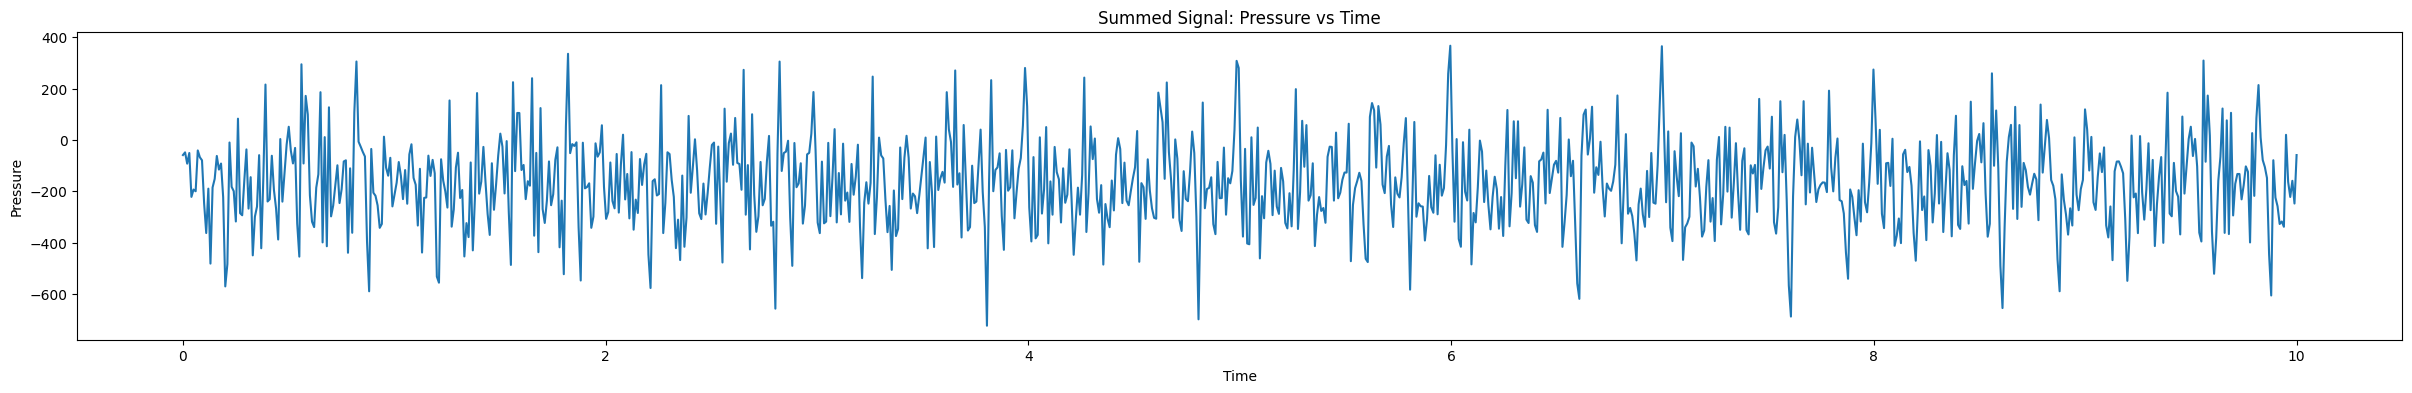

In [171]:
y = summed_signals
x = np.linspace(start=start_time, stop=end_time, num=sample_frequency * (end_time - start_time))
plt.figure(figsize=(30, 4))
plt.title("Summed Signal: Pressure vs Time")
plt.ylabel("Pressure")
plt.xlabel("Time")
plt.plot(x,y)
plt.show()

## **"Almost" Fourier Transform**

In [174]:
def wrap(summed_data, wrap_freq, time_steps) -> np.float32:
    wrapped_points = summed_data * np.exp(-2 * np.pi * 1j * wrap_freq * time_steps)

    n = len(wrapped_points)
    real_sum = 0
    imag_sum = 0

    for point in wrapped_points:
        real_sum += point.real
        imag_sum += point.imag
    
    # Now you can normalize and take the unit vector, but doesn't really matter ngl

    real_coord_norm = real_sum / n
    imag_coord_norm = imag_sum / n

    mag_diff = np.float32(np.linalg.norm([real_coord_norm, imag_coord_norm]))

    return mag_diff

center_of_mass_mags = []
for wrapping_frequency in np.linspace(start=1, stop=100, num=5000):
    mag_diff = wrap(summed_signals, wrap_freq=wrapping_frequency, time_steps=x)
    center_of_mass_mags.append(mag_diff)

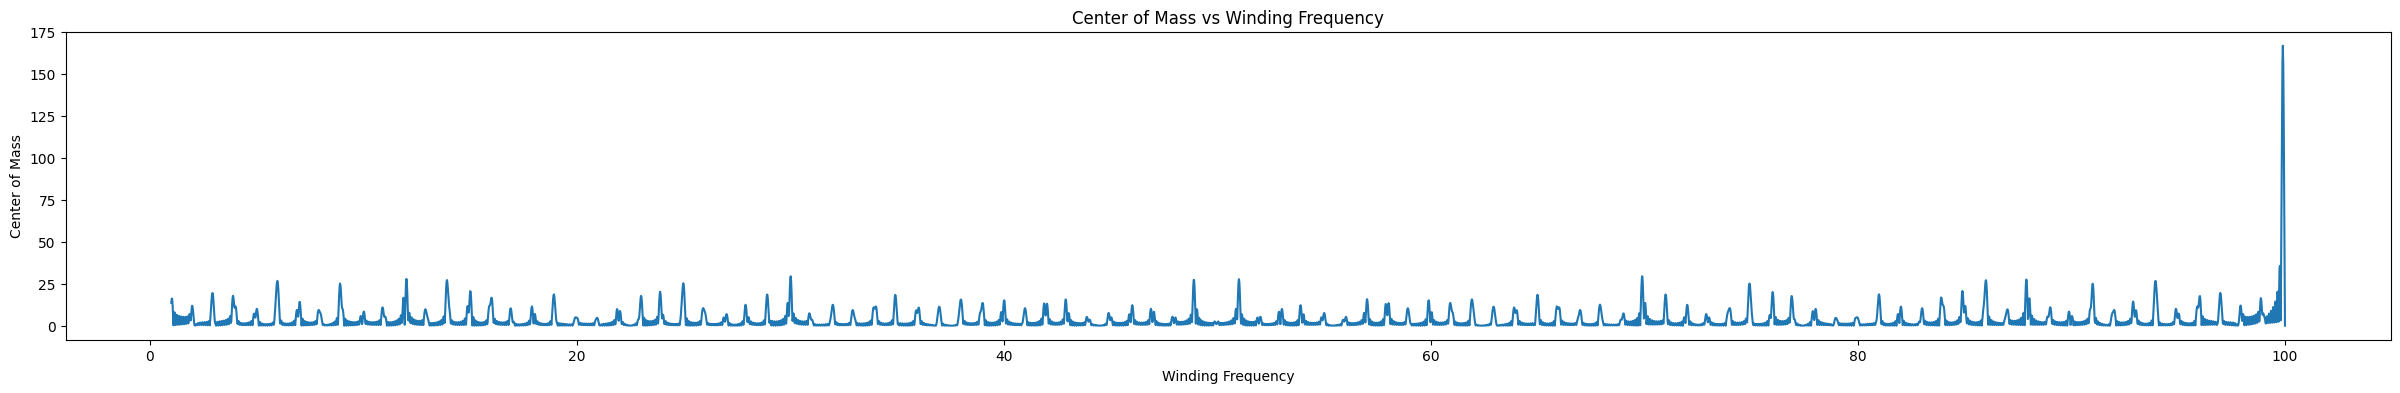

In [175]:
frequencies = np.linspace(start=1, stop=100, num=5000)
center_of_masses = center_of_mass_mags

plt.figure(figsize=(30, 4))
plt.title("Center of Mass vs Winding Frequency")
plt.xlabel("Winding Frequency")
plt.ylabel("Center of Mass")
plt.plot(frequencies, center_of_masses)
plt.show()

## **The Discrete Fourier Transform (The real Fourier Transform for Finite sequences)**

In [176]:
def get_dft_matrix(signal_range, N):
    matrix = []
    frequency_num = (signal_range[1] - signal_range[0]) * 10
    for k in np.linspace(start=signal_range[0], stop=signal_range[1], num=frequency_num):
        signalRow = np.array([np.exp(-1j * 2 * np.pi * k * n / N) for n in range(0, N)])
        matrix.append(signalRow)

    return np.array(matrix), np.linspace(start=signal_range[0], stop=signal_range[1], num=frequency_num)

In [180]:
def fourier_transform(summed_data):
    signal_range = (0, 100)
    dftMatrix, frequencies = get_dft_matrix(signal_range=signal_range, N=len(summed_data))

    signal_strengths = np.matmul(dftMatrix, summed_data)

    return signal_strengths, frequencies

In [181]:
strengths, frequencies = fourier_transform(summed_signals)

C:\Users\lordw\AppData\Local\Temp\ipykernel_49316\3891773165.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


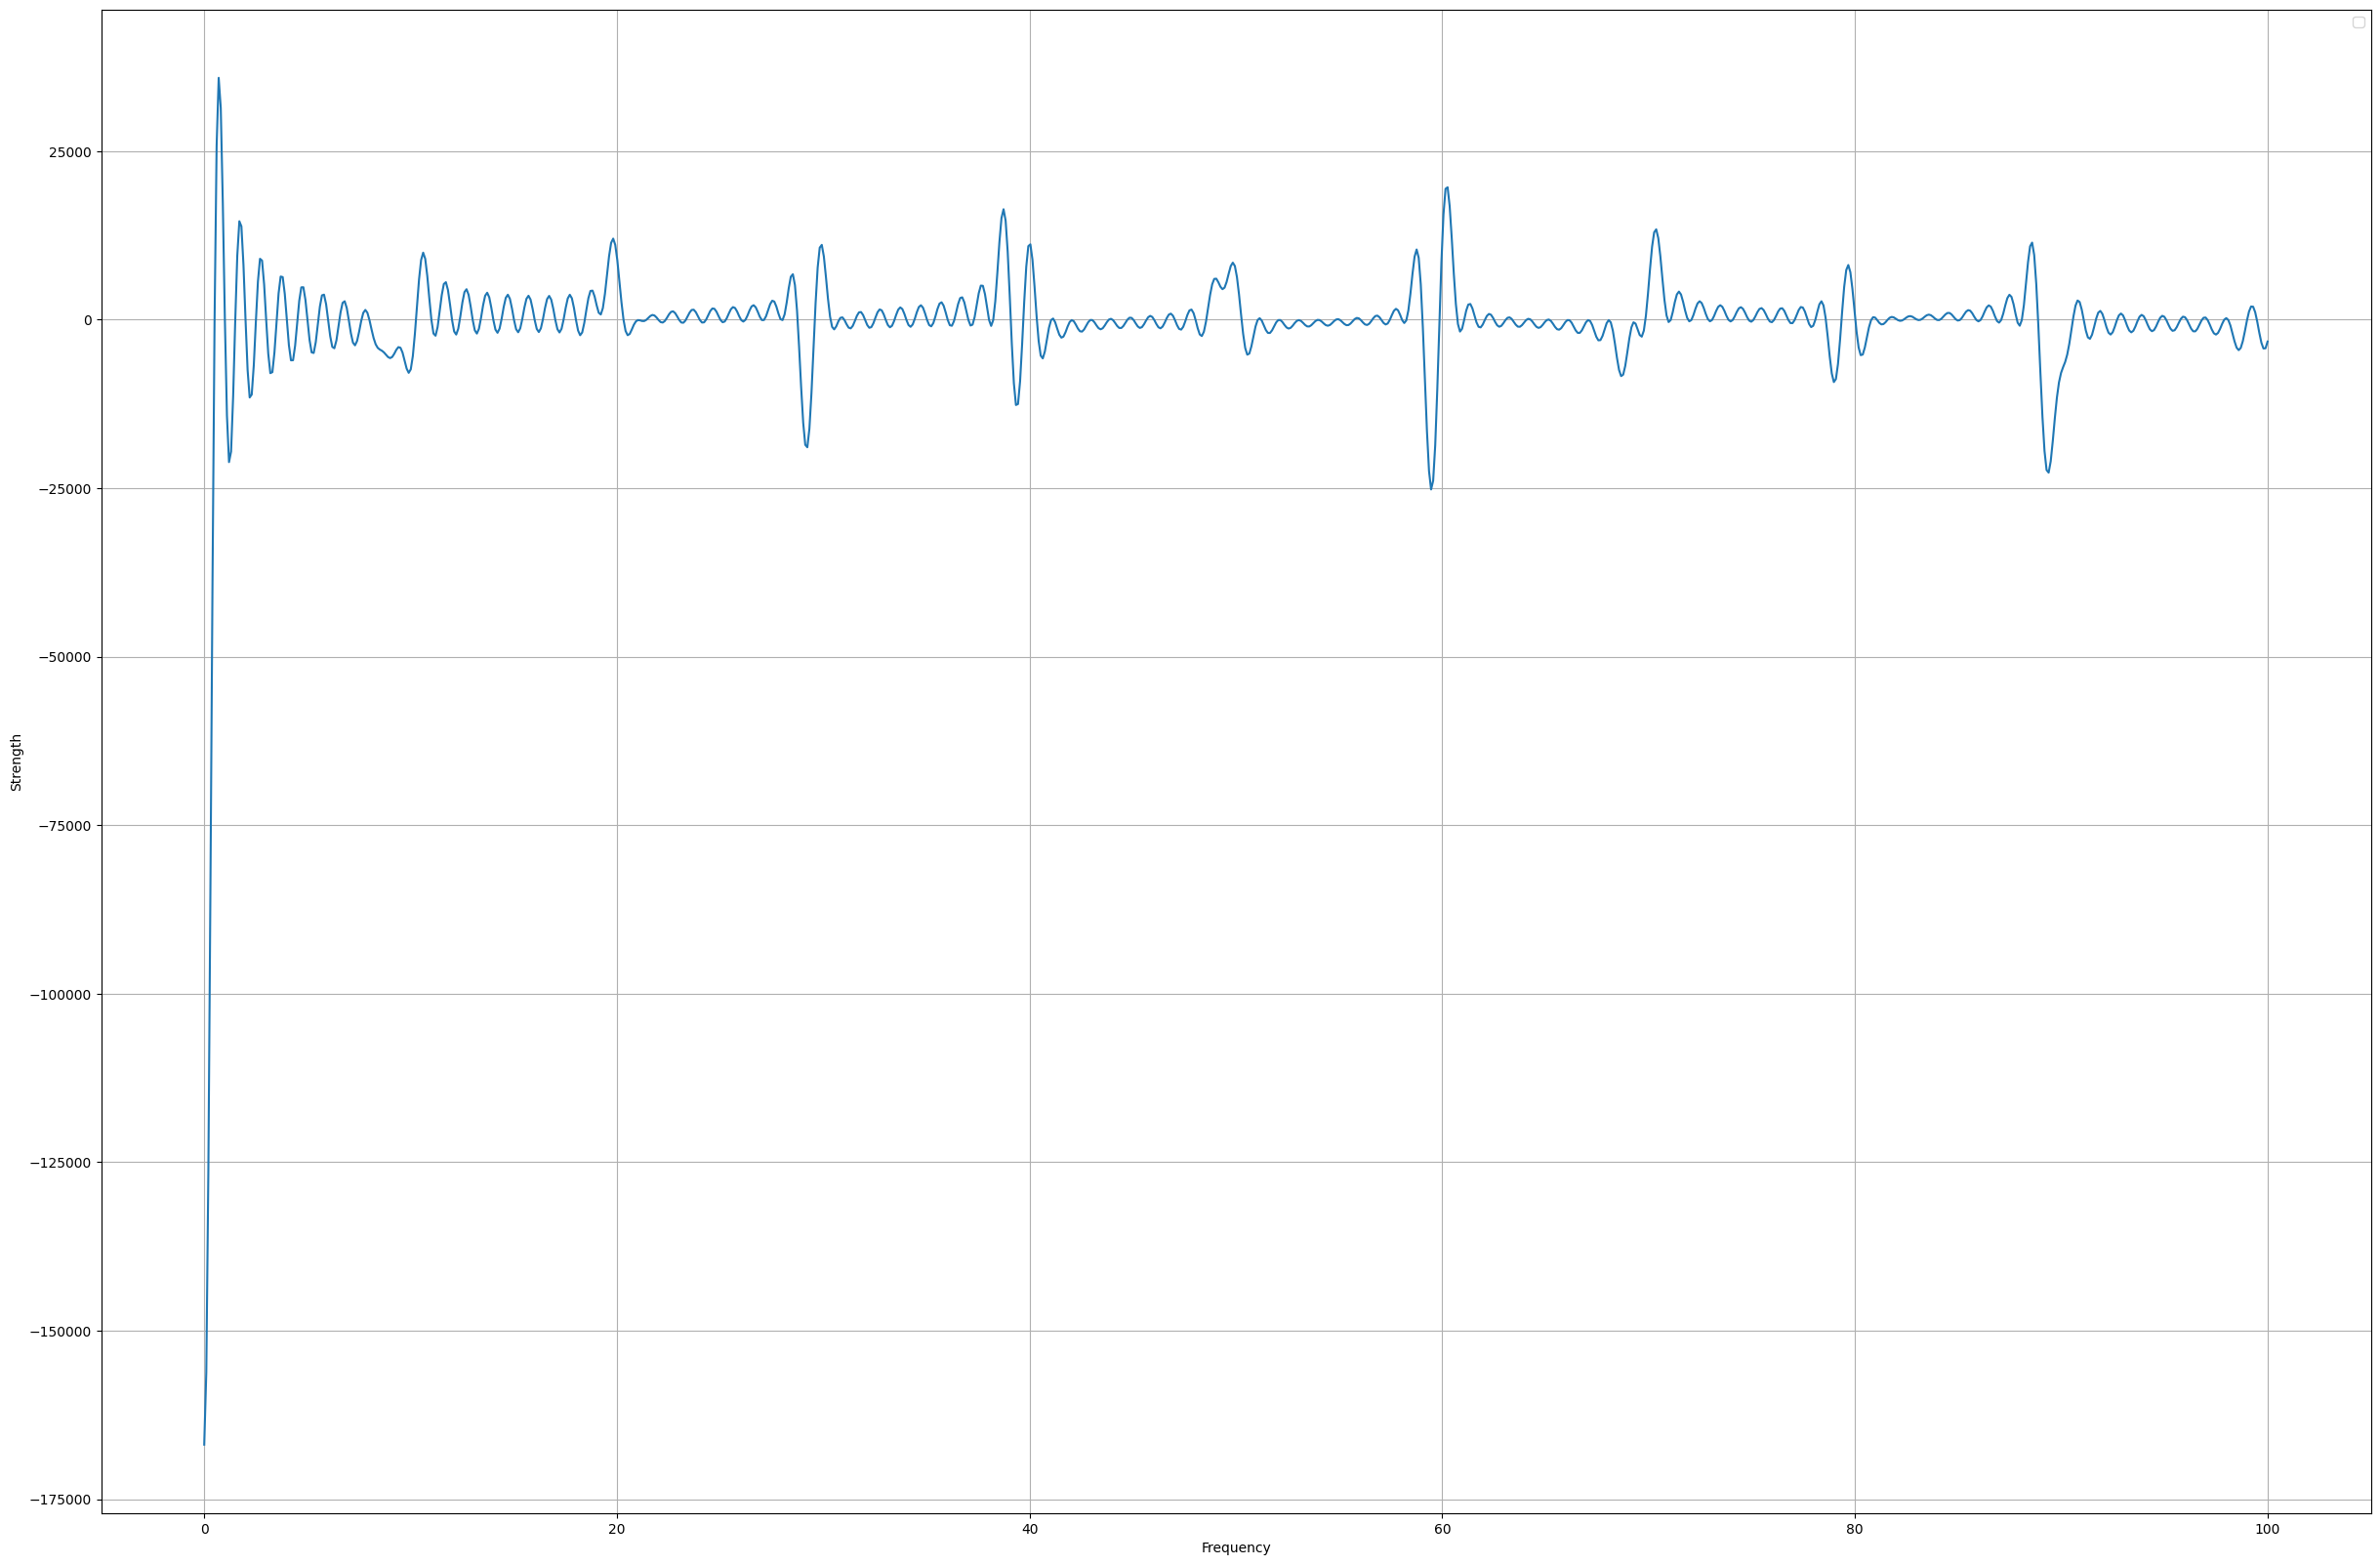

In [182]:
plt.figure(figsize=(30, 20))
plt.plot(frequencies, strengths)
plt.ylabel("Strength")
plt.xlabel("Frequency")
plt.legend()
plt.grid()
plt.show()